# Market Response
This notebook tries to see how global markets respond to local shortages.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from helper import remove_f_years, yearly_trade, yearly_trade_by_country

## Loading the datasets
Loads the datasets into panda dataframes

In [2]:
df_trade = pd.read_pickle('../data/df_trade.pkl')
df_prod = pd.read_pickle('../data/df_prod.pkl')

In [3]:
df_trade.head()

Reporter Countries Partner Countries                              Item  \
11        Afghanistan         Argentina                             Maize   
12        Afghanistan         Argentina                             Maize   
25        Afghanistan         Australia  Anise, badian, fennel, coriander   
26        Afghanistan         Australia  Anise, badian, fennel, coriander   
27        Afghanistan         Australia                          Apricots   

            Element      Unit  Y1993  Y1994  Y1995  Y1996  Y1997  ...  Y2007  \
11  Import Quantity    tonnes    0.0    0.0    0.0    0.0    0.0  ...    0.0   
12     Import Value  1000 US$    0.0    0.0    0.0    0.0    0.0  ...    0.0   
25  Export Quantity    tonnes    0.0    0.0    0.0    0.0    0.0  ...    0.0   
26     Export Value  1000 US$    0.0    0.0    0.0    0.0    0.0  ...    0.0   
27  Export Quantity    tonnes    0.0    0.0    0.0    0.0    0.0  ...    0.0   

    Y2008  Y2009  Y2010  Y2011  Y2012  Y2013  Y2014  Y2015  Y2016  
11    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
12    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
25    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
26    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
27    0.0    0.0    3.0    0.0    0.0    0.0    0.0    0.0    0.0  

[5 rows x 29 columns]

In [4]:
df_prod.head()

Area                              Item         Element    Unit  \
0  Afghanistan               Almonds, with shell  Area harvested      ha   
1  Afghanistan               Almonds, with shell           Yield   hg/ha   
2  Afghanistan               Almonds, with shell      Production  tonnes   
3  Afghanistan  Anise, badian, fennel, coriander  Area harvested      ha   
4  Afghanistan  Anise, badian, fennel, coriander           Yield   hg/ha   

     Y1993    Y1994    Y1995    Y1996    Y1997    Y1998  ...    Y2007  \
0   5500.0   5500.0   5500.0   5500.0   5500.0   5500.0  ...  12000.0   
1  16364.0  16364.0  16364.0  16364.0  16364.0  16364.0  ...  26234.0   
2   9000.0   9000.0   9000.0   9000.0   9000.0   9000.0  ...  31481.0   
3   2270.0   2871.0   3000.0   7000.0   4000.0  12000.0  ...  28000.0   
4   6854.0   6761.0   6667.0   6000.0   6250.0   5917.0  ...   6071.0   

     Y2008    Y2009    Y2010    Y2011    Y2012    Y2013    Y2014    Y2015  \
0  12000.0  11029.0  11210.0  13469.0  13490.0  14114.0  13703.0  14676.0   
1  35000.0  39154.0  49955.0  45000.0  45960.0  29910.0  19996.0  16521.0   
2  42000.0  43183.0  56000.0  60611.0  62000.0  42215.0  27400.0  24246.0   
3  15000.0  17748.0  17000.0  19500.0  18500.0  18500.0  30000.0  25000.0   
4   6000.0   6203.0   6000.0   6414.0   6757.0   6757.0   7167.0   7200.0   

     Y2016  
0  19481.0  
1  16859.0  
2  32843.0  
3  26019.0  
4   6923.0  

[5 rows x 28 columns]

## Looking at production of different items over the years
Check food production to find shortages of locally produced foods

In [10]:
df_prod_ch = df_prod[df_prod['Area'] == 'Switzerland']
prod_items_ch = set(df_prod_ch['Item'].value_counts().index)
print(len(prod_items_ch))
print(prod_items_ch)

53
{'Chillies and peppers, green', 'Kiwi fruit', 'Tobacco, unmanufactured', 'Soybeans', 'Vegetables, fresh nes', 'Strawberries', 'Rye', 'Peas, green', 'Broad beans, horse beans, dry', 'Fruit, fresh nes', 'Mushrooms and truffles', 'Gooseberries', 'Apples', 'Cherries', 'Barley', 'Peas, dry', 'Cucumbers and gherkins', 'Rapeseed', 'Asparagus', 'Apricots', 'Wheat', 'Grapes', 'Maize, green', 'Cauliflowers and broccoli', 'Quinces', 'Garlic', 'Hops', 'Maize', 'Triticale', 'Onions, shallots, green', 'Plums and sloes', 'Cabbages and other brassicas', 'Beans, green', 'Peaches and nectarines', 'Currants', 'Onions, dry', 'Oilseeds nes', 'Tomatoes', 'Grain, mixed', 'Potatoes', 'Artichokes', 'Lettuce and chicory', 'Walnuts, with shell', 'Pumpkins, squash and gourds', 'Sunflower seed', 'Carrots and turnips', 'Pears', 'Spinach', 'Sugar beet', 'Chestnut', 'Melons, other (inc.cantaloupes)', 'Blueberries', 'Leeks, other alliaceous vegetables'}


In [11]:
df_trade_ch = df_trade[df_trade['Reporter Countries'] == 'Switzerland']
df_import_ch = df_trade_ch[df_trade_ch['Element'] == 'Import Quantity']
import_items_ch = set(df_import_ch['Item'].value_counts().index)
print(len(import_items_ch))
print(import_items_ch)

112
{'Chillies and peppers, green', 'Pyrethrum, dried', 'Fonio', 'Oil, palm', 'Plantains and others', 'Oranges', 'Strawberries', 'Lentils', 'Lemons and limes', 'Fruit, fresh nes', 'Mushrooms and truffles', 'Flax fibre and tow', 'Jute', 'Tea', 'Poppy seed', 'Avocados', 'Tangerines, mandarins, clementines, satsumas', 'Asparagus', 'Pepper (piper spp.)', 'Papayas', 'Oilseeds nes', 'Currants', 'Oats', 'Potatoes', 'Ginger', 'Nutmeg, mace and cardamoms', 'Sunflower seed', 'Walnuts, with shell', 'Carrots and turnips', 'Melons, other (inc.cantaloupes)', 'Kola nuts', 'Grapefruit (inc. pomelos)', 'Buckwheat', 'Soybeans', 'Cranberries', 'Chick peas', 'Rye', 'Peas, green', 'Vanilla', 'Bananas', 'Cocoa, beans', 'Gooseberries', 'Persimmons', 'Quinoa', 'Bambara beans', 'Grapes', 'Apricots', 'Quinces', 'Maize', 'Pistachios', 'Dates', 'Beans, green', 'Watermelons', 'Onions, shallots, green', 'Almonds, with shell', 'Chillies and peppers, dry', 'Hazelnuts, with shell', 'Fibre crops nes', 'Olives', 'Lettuc

In [12]:
comparable_items = import_items_ch.intersection(prod_items_ch)
print(len(comparable_items))
print(comparable_items)

50
{'Chillies and peppers, green', 'Kiwi fruit', 'Tobacco, unmanufactured', 'Soybeans', 'Vegetables, fresh nes', 'Strawberries', 'Rye', 'Peas, green', 'Broad beans, horse beans, dry', 'Fruit, fresh nes', 'Mushrooms and truffles', 'Gooseberries', 'Apples', 'Cherries', 'Barley', 'Peas, dry', 'Cucumbers and gherkins', 'Rapeseed', 'Asparagus', 'Apricots', 'Wheat', 'Grapes', 'Cauliflowers and broccoli', 'Hops', 'Quinces', 'Garlic', 'Maize', 'Triticale', 'Onions, shallots, green', 'Plums and sloes', 'Cabbages and other brassicas', 'Beans, green', 'Peaches and nectarines', 'Currants', 'Onions, dry', 'Oilseeds nes', 'Tomatoes', 'Potatoes', 'Artichokes', 'Lettuce and chicory', 'Walnuts, with shell', 'Pumpkins, squash and gourds', 'Sunflower seed', 'Carrots and turnips', 'Pears', 'Spinach', 'Sugar beet', 'Chestnut', 'Melons, other (inc.cantaloupes)', 'Leeks, other alliaceous vegetables'}


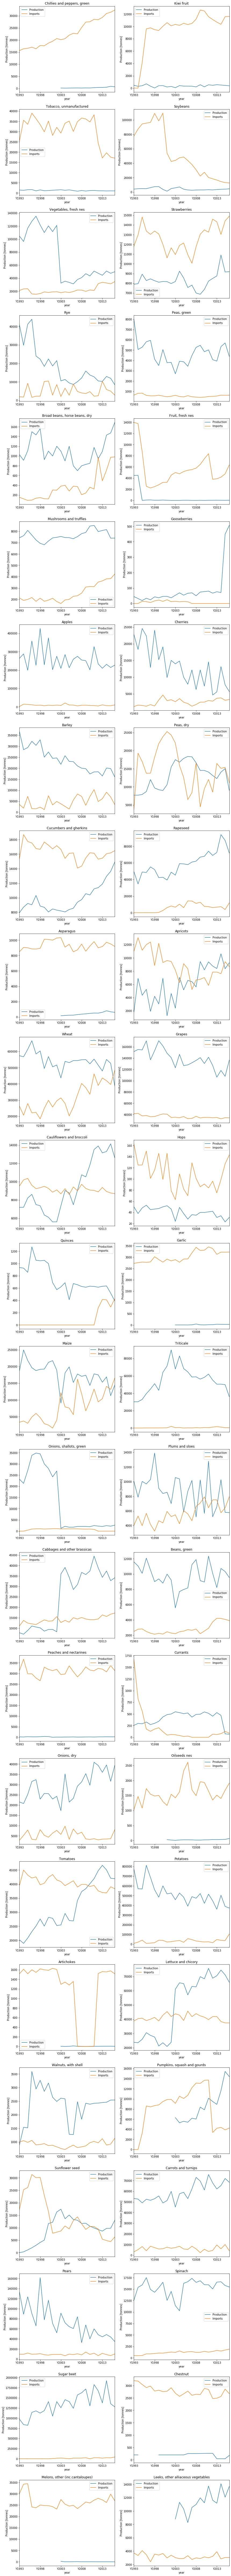

In [26]:
ITEMS = comparable_items

col = 2
row = 25
plt_size = 7 

fig, axs = plt.subplots(row, col, figsize=(col * plt_size, row * plt_size))
axs = axs.reshape((-1,))

for idx, item in enumerate(ITEMS):
    axs[idx].set_title(f'{item}')
    axs[idx].set_xlabel(f'year')
    axs[idx].set_ylabel(f'Quantity [tonnes]')
    # Production
    df_prod_ch_item = df_prod_ch[df_prod_ch['Item'] == item]
    df_prod_ch_item = df_prod_ch_item[df_prod_ch_item['Unit'] == 'tonnes']
    df_prod_ch_item = df_prod_ch_item[[f'Y{label}' for label in range(1993, 2017)]]
    df_prod_ch_item = df_prod_ch_item.transpose()
    df_prod_ch_item.rename(columns={df_prod_ch_item.columns[0]: "Production"}, inplace = True)
    df_prod_ch_item.plot(ax=axs[idx], label='Production')
    # Import
    df_import_ch_item = yearly_trade_by_country(df_trade, 'Switzerland', item)['Imports']
    df_import_ch_item.plot(ax=axs[idx], label='Imports')
    axs[idx].legend()
    # Imports + Production - Exports
    
plt.show()

In [37]:
def plot_all(country):
    df_prod_country = df_prod[df_prod['Area'] == country]
    prod_items_country = set(df_prod_country['Item'].value_counts().index)
    df_trade_country = df_trade[df_trade['Reporter Countries'] == country]
    df_import_country = df_trade_country[df_trade_country['Element'] == 'Import Quantity']
    df_export_country = df_trade_country[df_trade_country['Element'] == 'Export Quantity']
    import_items_country = set(df_import_country['Item'].value_counts().index)
    export_items_country = set(df_export_country['Item'].value_counts().index)
    items = prod_items_country.intersection(import_items_country.intersection(export_items_country))

    col = 2
    row = int(len(items)/2) + 1
    plt_size = 7 

    fig, axs = plt.subplots(row, col, figsize=(col * plt_size, row * plt_size))
    axs = axs.reshape((-1,))

    for idx, item in enumerate(items):
        axs[idx].set_title(f'{item}')
        axs[idx].set_xlabel(f'year')
        axs[idx].set_ylabel(f'Quantity [tonnes]')
        # Production
        df_prod_item = df_prod_country[df_prod_country['Item'] == item]
        df_prod_item = df_prod_item[df_prod_item['Unit'] == 'tonnes']
        df_prod_item = df_prod_item[[f'Y{label}' for label in range(1993, 2017)]]
        df_prod_item = df_prod_item.iloc[0]
        df_prod_item.plot(ax=axs[idx], label='Production')
        # Import
        df_import_item = yearly_trade_by_country(df_trade, country, item)['Imports']
        df_import_item.plot(ax=axs[idx], label='Imports')
        # Export
        df_export_item = yearly_trade_by_country(df_trade, country, item)['Exports']
        df_export_item.plot(ax=axs[idx], label='Exports')
        # Imports + Production - Exports
        df_consumption = df_import_item + df_prod_item - df_export_item
        df_consumption.plot(ax=axs[idx], label='Consumption')
        axs[idx].legend()

    plt.show()

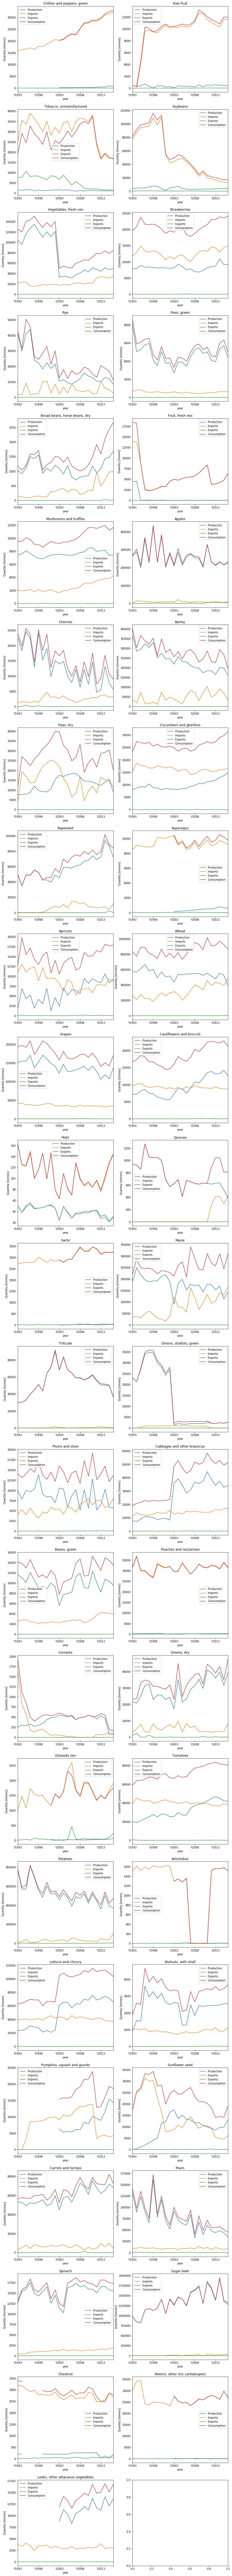

In [38]:
plot_all('Switzerland')

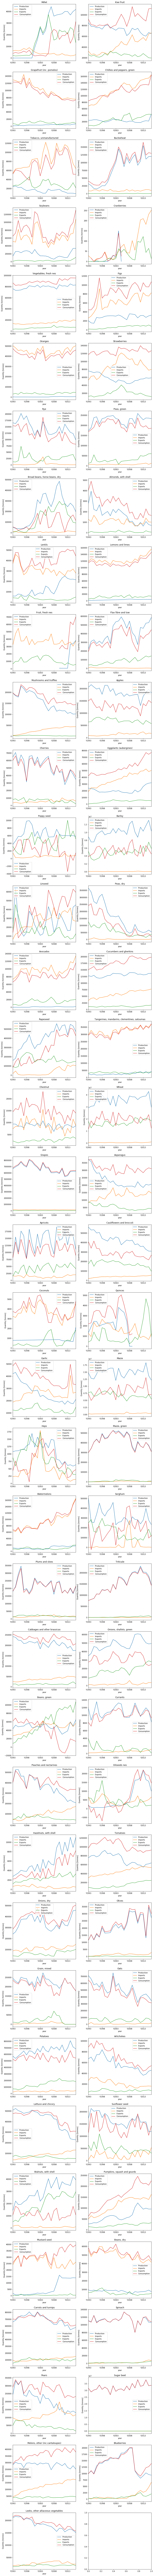

In [39]:
plot_all('France')

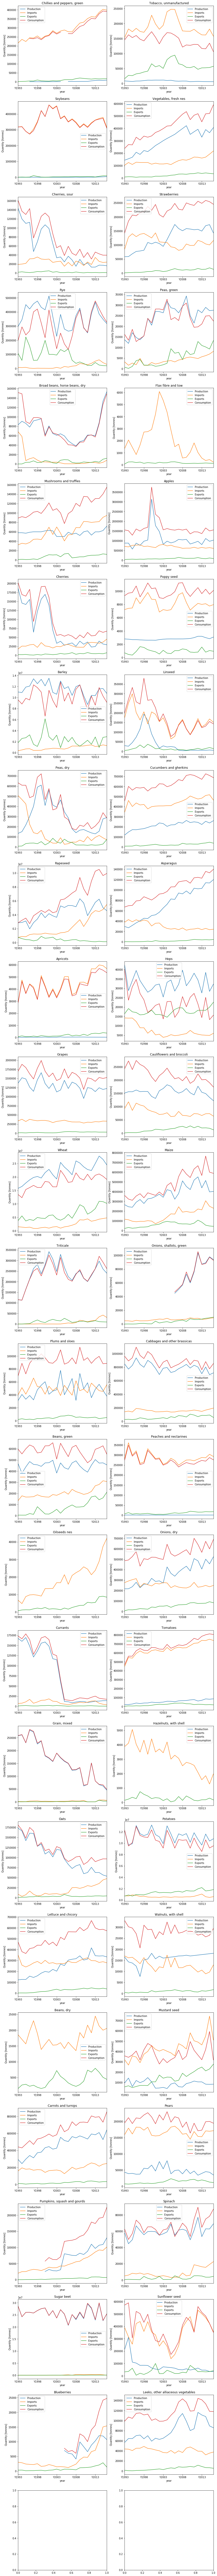

In [40]:
plot_all('Germany')